# Implementing Perceptron/Adaline ML Algorithms in Python

Code following along with the opensesame turorial [python machine learning course](https://player.opensesame.com/coursecontent/e0574515-e184-9194-31e9-355866e13f22/232590/00000000-0000-0000-0000-000000000000/62D4A280;de06e6f7424c2da8eefe20a3a55d1d5039561b361b5dd60e332433627667306c/scormcontent/index.html#/).

In [1]:
%load_ext lab_black

In [2]:
import numpy as np
from numpy.random import seed
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.colors import ListedColormap

# set the plot figure size
rcParams["figure.figsize"] = 10, 5
%matplotlib inline

## The Iris Dataset

In [3]:
# load the iris dataset
csv_name = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
header = None

# load the data into a pandas datafraem
df = pd.read_csv(csv_name, header=header)

In [4]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


extract the first 100 class labels, corresponding to the 50 Iris-setosa and 50
Iris-versicolor flowers


In [5]:
y = df.iloc[0:100, 4].values

# np.where(condition[, x, y]) <<--- function signature
negative_class = -1
positive_class = 1
condition = y == "Iris-setosa"
y = np.where(condition, negative_class, positive_class)

X = df.iloc[0:100, [0, 2]].values

lets visualize our feature matrix, 'X', using a 2d scatter plot


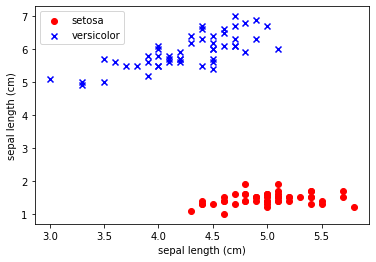

In [6]:
# setosa plot
sepal_length = X[0:50, 0]  # sepal length feature (first 50 samples)
petal_length = X[0:50, 1]  # petal length feature (first 50 samples)
color = "red"
marker = "o"
label = "setosa"
plt.scatter(x=sepal_length, y=petal_length, color=color, marker=marker, label=label)

# versicolor plot
petal_length = X[50:100, 0]  # petal length feature (next 50 samples)
sepal_length = X[50:100, 1]  # sepal length feature (next 50 samples)
color = "blue"
marker = "x"
label = "versicolor"
plt.scatter(x=sepal_length, y=petal_length, color=color, marker=marker, label=label)

# label the axes
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal length (cm)")

# add a legend
location = "upper left"
plt.legend(loc=location)

## Implementing a perceptron algorithm in python

In [8]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    -----------
    eta :  float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes (epochs) over the training set.add

    Atrributes
    -----------
    w_: 1d-array
        weights afer fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """

    def __init__(self, eta=0.1, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit method for training data.

        Parameters
        -----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where 'n_samples' is the number
            of sampls and 'n_features' is the number of
            features.
        y : {array_like}, shape = [n_samples]
            Target values

        Returns
        --------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate the net input."""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Rturn class label after the unit step."""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Train our perceptron on the iris dataset

In [9]:
# instantiate a perceptron object
eta = 0.1
n_iter = 10
ppn = Perceptron(eta=eta, n_iter=n_iter)


# fit the perceptron instance to our training data
ppn.fit(X, y)

### Evaluate the learning process 

Text(0, 0.5, 'number of misclassifications')

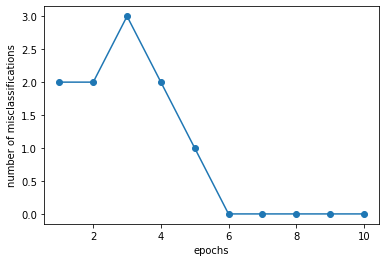

In [10]:
# lets plot our misclassification error
epochs = range(1, len(ppn.errors_) + 1)
misclassification = ppn.errors_
plt.plot(epochs, misclassification, marker="o")
# axis labels
plt.xlabel("epochs")
plt.ylabel("number of misclassifications")

### Create a convenience function to visualize the dcision regions

In [11]:
def plot_decision_regions(X, y, classifier, resolution=0.2):
    """Convenience function for visualizing decision boundaries"""
    # setup marker genearot and clolr map
    # this can handle multi-class plotting
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[: len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution),
    )

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

    Z = Z.reshape(xx1.shape)
    plt.figure()
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)

    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot the class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            color=cmap(idx),
            marker=markers[idx],
            label=cl,
        )

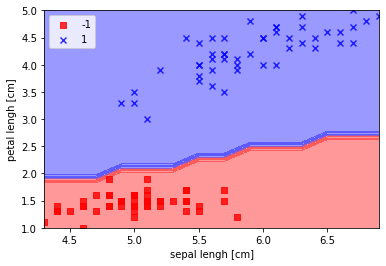

In [12]:
# try it out
X = X
y = y
classifier = ppn
plot_decision_regions(X=X, y=y, classifier=classifier)

# add axis labels and a legend
plt.xlabel("sepal lengh [cm]")
plt.ylabel("petal lengh [cm]")

plt.legend(loc="upper left")

## Implementing the adaptive linear neuron algorithm (adaline) in python

In [13]:
class AdalineGd(object):
    """ADAptive LInear NEuron Classifier.

    Parameters
    -----------

    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : (int)
        Passes (epochs) over the training set.

    Atrributes
    -----------
    w_: 1d-array
        weights afer fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """

    def __init__(self, eta=0.1, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit method for training data.

        Parameters
        -----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where 'n_samples' is the number
            of sampls and 'n_features' is the number of features.
        y : {array_like}, shape = [n_samples]
            Target values

        Returns
        --------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        # use batch gradient descent instead of incremental uipdating like Perceptron
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = y - output
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors * errors).sum() / 2.0
            self.cost_.append(cost)

        return self

    def net_input(self, X):
        """Calculate the net input."""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation."""
        return self.net_input(X)

    def predict(self, X):
        """Rturn class label after the unit step."""
        return np.where(self.activation(X) >= 0.0, 1, -1)

### Choose a learning rate

Choosing a learning rate can take experimentation 

Let's plot the difference between two learning rates

Text(0.5, 1.0, 'Adaline - Learning rate 0.0001')

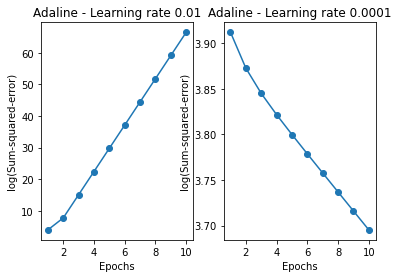

In [14]:
nrows = 1
ncols = 2
fig, ax = plt.subplots(nrows=nrows, ncols=ncols)

# use the first learning rate to fit the training data
n_iter = 10
eta = 0.01

ada1 = AdalineGd(n_iter=n_iter, eta=eta)

# fit the model
ada1.fit(X, y)

epochs = range(1, len(ada1.cost_) + 1)
misclassifications = np.log(ada1.cost_)
marker = "o"

# plot the first learning rate
ax[0].plot(epochs, misclassifications, marker=marker)

# set the labels and title
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("log(Sum-squared-error)")
ax[0].set_title(f"Adaline - Learning rate {eta}")


# use the second learning rate to fit the training data
n_iter = 10
eta = 0.0001
ada2 = AdalineGd(n_iter=n_iter, eta=eta)

# fit the model
ada2.fit(X, y)

epochs = range(1, len(ada2.cost_) + 1)
misclassifications = np.log(ada2.cost_)
marker = "o"

# plot the first learning rate
ax[1].plot(epochs, misclassifications, marker=marker)

# set the labels and title
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("log(Sum-squared-error)")
ax[1].set_title(f"Adaline - Learning rate {eta}")

### feature standardization to improve algorithm performance

In [15]:
X_std = np.copy(X)
X_std[:, 0] = (X_std[:, 0] - X_std[:, 0].mean()) / X_std[:, 0].std()
X_std[:, 1] = (X_std[:, 1] - X_std[:, 1].mean()) / X_std[:, 1].std()

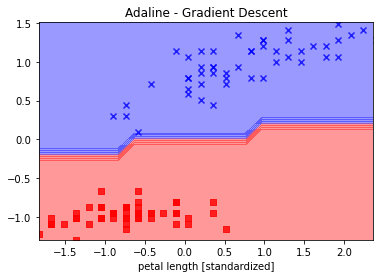

Text(0.5, 1.0, 'Adaline - Learning rate 0.01')

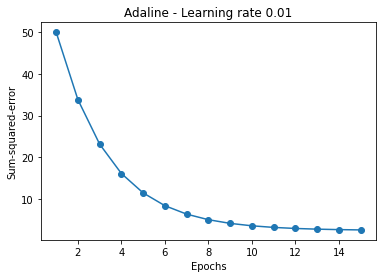

In [16]:
# now we'll traing the adaline again on the standardized features and look for improvements
n_iter = 15
eta = 0.01

ada = AdalineGd(n_iter=n_iter, eta=eta)

# train the model
ada.fit(X_std, y)

# plot the decision regions
classifier = ada
plot_decision_regions(X_std, y, classifier=classifier)

plt.title("Adaline - Gradient Descent")
plt.xlabel("sepal length [standardized]")
plt.xlabel("petal length [standardized]")
plt.show()

epochs = range(1, len(ada.cost_) + 1)
misclassifications = ada.cost_
marker = "o"

# plot the first learning rate
plt.plot(epochs, misclassifications, marker=marker)

# set the labels and title
plt.xlabel("Epochs")
plt.ylabel("Sum-squared-error")
plt.title(f"Adaline - Learning rate {eta}")

## adaline with stochastic gardient descent

In [17]:
class AdalineSGD(object):
    """ADAptive LInear NEuron Classifier.

    Parameters
    -----------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : (int)
        Passes (epochs) over the training set.

    Atrributes
    -----------
    w_: 1d-array
        weights afer fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    shuffle : bool (default: True)
        Shuffles training data every epoch if 'True' to prevent cycles.
    random_state : int (default: ?None)
        Set random state for shuffling and initializing weights.

    """

    def __init__(self, eta=0.1, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        # 'random_state' allows us to make results re-producable from run to run
        if random_state:
            seed(random_state)

    def fit(self, X, y):
        """Fit method for training data.

        Parameters
        -----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where 'n_samples' is the number
            of sampls and 'n_features' is the number of features.
        y : {array_like}, shape = [n_samples]
            Target values

        Returns
        --------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        # we now update the weights aferter each training sample
        # self.w_ = np.zeros(1 + X.shape[1])
        # self.cost_ = []

        # use batch gradient descent instead of incremental uipdating like Perceptron
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)

        return self

    def partial_fit(self, X, y):
        """Fit training data without re-initalizing the weights."""
        # this new method alllows us to use the adaline for online learning
        # since weights are not re-initialized
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)

        return self

    def _shuffle(self, X, y):
        """Shuffle training data."""
        # use this method to shuffle the training data before each epoch
        r = np.random.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        """Initialize weights to zeros."""
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True
        return self

    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights."""
        output = self.net_input(xi)
        error = target - output

        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error * error
        return cost

    def net_input(self, X):
        """Calculate the net input."""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation."""
        return self.net_input(X)

    def predict(self, X):
        """Rturn class label after the unit step."""
        return np.where(self.activation(X) >= 0.0, 1, -1)

### train the adaine and plot the results

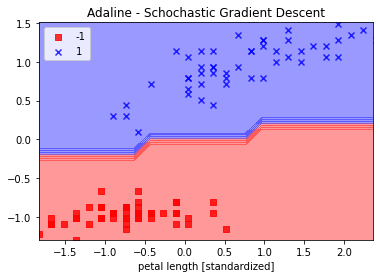

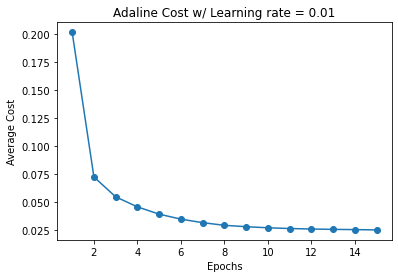

In [19]:
# instantiate the model
n_iter = 15
eta = 0.01
random_state = 1
ada = AdalineSGD(n_iter=n_iter, eta=eta, random_state=random_state)

# fit the model
ada.fit(X_std, y)

# plot the decision regions
plot_decision_regions(X_std, y, classifier=ada)

plt.title("Adaline - Schochastic Gradient Descent")
plt.xlabel("sepal length [standardized]")
plt.xlabel("petal length [standardized]")
plt.legend(loc="upper left")
plt.show()

# plot the error
epochs = range(1, len(ada.cost_) + 1)
misclassifications = ada.cost_
marker = "o"
plt.plot(epochs, misclassifications, marker=marker)

# set the labels and title
plt.xlabel("Epochs")
plt.ylabel("Average Cost")
plt.title(f"Adaline Cost w/ Learning rate = {ada.eta}")
plt.show()